In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
pitchers=pd.read_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 6/prepared data/aggregations/pitchers_ext_region.csv')

In [4]:
batters=pd.read_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 6/prepared data/aggregations/batters_ext_region.csv')

## Adding a  Yes/No column that will say "yes" if a batter has a career WAR above 13 and a pitcher has a career WAR above 10

In [5]:
batters.columns

Index(['playerID', 'WAR', 'HR', 'ASG', 'H', 'seasonsPlayed', 'region',
       'birthCountry', 'birthState', 'birthCity'],
      dtype='object')

In [6]:
pitchers.columns

Index(['playerID', 'WAR', 'ERA_plus', 'G_all', 'seasonsPlayed', 'ASG',
       'region', 'birthCountry', 'birthState', 'birthCity'],
      dtype='object')

In [31]:
#Batters
batters.loc[(batters['WAR'] >= 13),'regression']='yes'
batters.loc[(batters['WAR'] < 13),'regression']='no'

In [32]:
#Pitchers
pitchers.loc[(pitchers['WAR'] >= 10),'regression']='yes'
pitchers.loc[(pitchers['WAR'] < 10),'regression']='no'

In [33]:
batters.columns

Index(['playerID', 'WAR', 'HR', 'ASG', 'H', 'seasonsPlayed', 'region',
       'birthCountry', 'birthState', 'birthCity', 'regression'],
      dtype='object')

In [34]:
pitchers.columns

Index(['playerID', 'WAR', 'ERA_plus', 'G_all', 'seasonsPlayed', 'ASG',
       'region', 'birthCountry', 'birthState', 'birthCity', 'regression'],
      dtype='object')

### Doing some datset checks

In [35]:
batters.isnull().any()

playerID         False
WAR              False
HR               False
ASG              False
H                False
seasonsPlayed    False
region           False
birthCountry     False
birthState        True
birthCity         True
regression       False
dtype: bool

In [36]:
pitchers.isnull().any()

playerID         False
WAR              False
ERA_plus          True
G_all            False
seasonsPlayed    False
ASG              False
region           False
birthCountry     False
birthState        True
birthCity         True
regression       False
dtype: bool

In [37]:
#The nulls are okay in this case :)

<AxesSubplot:xlabel='regression', ylabel='count'>

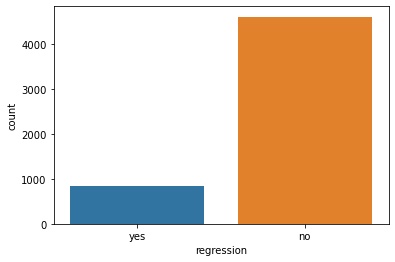

In [38]:
#How many batters have a career WAR over 13?
sns.countplot(x='regression', data=batters)

<AxesSubplot:xlabel='regression', ylabel='count'>

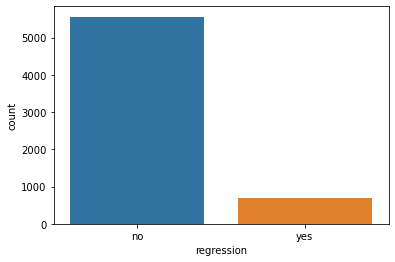

In [39]:
#How many pitchers have a career WAR over 10?
sns.countplot(x='regression', data=pitchers)

## Adding a dummy column for our categorical data, the region

In [48]:
region_dummies = pd.get_dummies(batters['region'], prefix='region')

# Add the dummy variables to the original DataFrame
batters_dummy= pd.concat([batters, region_dummies], axis=1)

# Drop the original 'region' column
batters_dummy.drop('region', axis=1, inplace=True)


In [49]:
batters_dummy

,playerID,WAR,HR,ASG,H,seasonsPlayed,birthCountry,birthState,birthCity,regression,region_Latin Born,region_Other,region_US Born
0,aaronha01,105.72,570,16.0,2659,17,USA,AL,Mobile,yes,0,0,1
1,aaronto01,-2.77,13,0.0,216,7,USA,AL,Mobile,no,0,0,1
2,abadan01,-0.35,0,0.0,2,3,USA,FL,Palm Beach,no,0,0,1
3,abbotje01,-1.44,18,0.0,157,5,USA,GA,Atlanta,no,0,0,1
4,abbotku01,0.54,62,0.0,523,10,USA,OH,Zanesville,no,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,zuletju01,-0.19,9,0.0,43,2,Panama,Panama,Panama,no,1,0,0
5425,zuninmi01,10.62,141,0.0,518,9,USA,FL,Cape Coral,no,0,0,1
5426,zupcibo01,-0.71,7,0.0,199,5,USA,PA,Pittsburgh,no,0,0,1
5427,zupofr01,0.12,0,0.0,2,1,USA,CA,San Francisco,no,0,0,1


In [50]:
region_dummies = pd.get_dummies(pitchers['region'], prefix='region')

# Add the dummy variables to the original DataFrame
pitchers_dummy= pd.concat([pitchers, region_dummies], axis=1)

# Drop the original 'region' column
pitchers_dummy.drop('region', axis=1, inplace=True)


In [51]:
pitchers_dummy

,playerID,WAR,ERA_plus,G_all,seasonsPlayed,ASG,birthCountry,birthState,birthCity,regression,region_Latin Born,region_Other,region_US Born
0,aardsda01,1.85,94.744369,331,9,0.0,USA,CO,Denver,no,0,0,1
1,aasedo01,15.09,126.585193,448,13,1.0,USA,CA,Orange,yes,0,0,1
2,abadfe01,3.18,116.022263,400,11,0.0,D.R.,La Romana,La Romana,no,1,0,0
3,abbotco01,-0.40,63.615385,8,1,0.0,USA,CA,San Diego,no,0,0,1
4,abbotgl01,5.26,97.366300,248,12,0.0,USA,AR,Little Rock,no,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,zitoba01,33.05,103.277974,434,15,2.0,USA,NV,Las Vegas,yes,0,0,1
6253,zobribe01,0.03,NaN,47,1,0.0,USA,IL,Eureka,no,0,0,1
6254,zuberty01,-0.12,94.390000,54,2,0.0,USA,AR,White Hall,no,0,0,1
6255,zumayjo01,4.17,145.361990,171,5,0.0,USA,CA,Chula Vista,no,0,0,1


In [53]:
batters_dummy.columns

Index(['playerID', 'WAR', 'HR', 'ASG', 'H', 'seasonsPlayed', 'birthCountry',
       'birthState', 'birthCity', 'regression', 'region_Latin Born',
       'region_Other', 'region_US Born'],
      dtype='object')

In [90]:
batters_dummy.to_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 6/prepared data/batters_dummy.csv')

In [91]:
pitchers_dummy.to_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 6/prepared data/pitchers_dummy.csv')


### define variables

In [54]:
# Define the independent variables (features)
X = batters_dummy[['region_Latin Born', 'region_Other', 'region_US Born']]

# Define the dependent variable (target)
y = batters_dummy['regression']

In [55]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression

In [56]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [57]:
y_pred = classifier.predict(X_test)

In [65]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
1790,no,no
3426,no,no
4684,no,no
2817,no,no
142,no,no
...,...,...
4681,no,no
3375,no,no
555,no,no
3335,no,no


In [68]:
#How many times these were equal, meaning that the actual was the predicted!
result['match'] = result['Predicted'] == result['Actual']


counts = result.groupby('match').size()


print(counts)


match
False     232
True     1397
dtype: int64


In [71]:
classifier.coef_
# array([[2.36839196, 1.42929561, 0.20973787]])
classifier.intercept_ 
# array([-1.1352347])

array([-1.71719239])

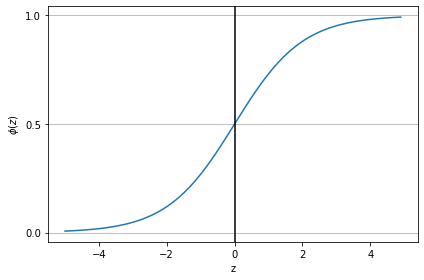

In [69]:
import numpy as np
import matplotlib.pyplot as plt
 
# Sigmoid function
#
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Creating sample Z points
#
z = np.arange(-5, 5, 0.1)
 
# Invoking Sigmoid function on all Z points
#
phi_z = sigmoid(z)
 
# Plotting the Sigmoid function
#
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [72]:
print(classifier.predict_proba(X))

[[0.84220473 0.15779527]
 [0.84220473 0.15779527]
 [0.84220473 0.15779527]
 ...
 [0.84220473 0.15779527]
 [0.84220473 0.15779527]
 [0.84220473 0.15779527]]


In [73]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1397,    0],
       [ 232,    0]])

Text(0.5, 15.0, 'Predicted label')

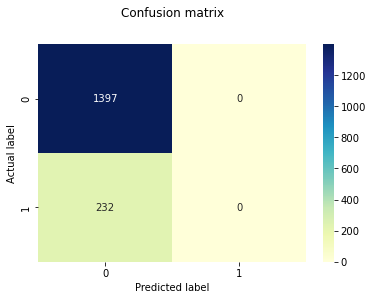

In [74]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Statistics

#### So, we see here that that actual for the most part is the typical, so our regression model would prove to be "strong"

In [82]:
classifier.predict 

<bound method LinearClassifierMixin.predict of LogisticRegression()>

In [83]:
classifier.score(x,y) 

0.8575813382443217

In [85]:
confusion_matrix(y, classifier.predict(x))


array([[1397,    0],
       [ 232,    0]])

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, classifier.predict(x)))

              precision    recall  f1-score   support

          no       0.86      1.00      0.92      1397
         yes       0.00      0.00      0.00       232

    accuracy                           0.86      1629
   macro avg       0.43      0.50      0.46      1629
weighted avg       0.74      0.86      0.79      1629



/Users/hillelkrief1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hillelkrief1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hillelkrief1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)